## ***Defining the Question***
Provided with the dataset from Nairobi Hospital, your are task to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## ***Metric For Success***
The Metric of Sucess will be to find a decission tree model to determine whether or not a patient has hypothyroid based on the patient's symptoms.

## ***Context***
Hypothyroid is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones. An example of the crucial hormone is thyroxin which plays vital roles in digestion, heart and muscle function, brain development and maintenance of bones.With that stated, Nairobi Hospital conducted a clinical camp to test for hypothyroidism.

## ***Experimental Design***


The experimental design for this project was in adherence to the CRISP-DM methodology.It will follow the CRISP-DM steps which are:

1.Problem Understanding

2.Data Understanding

3.Data Preparation

4.Modelling

5.Evaluation


## **Data Relevance**
The health care dataset is relevant to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

***Import the libraries***

In [166]:
#ILl first import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, \
GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore') 

In [167]:
#ILl then load the dataset
df = pd.read_csv('http://bit.ly/hypothyroid_data')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [168]:
#Ill then check the tail of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [169]:
#Ill check the the shape of the dataset
df.shape
# The output is 3163 rows and 26 columns

(3163, 26)

In [170]:
# Ill then use the .info() function which prints information about a DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

The .info() function shows index dtype and column dtypes, non-null values and memory usage.


## ***Data Cleaning***

In [171]:
#ILl then ensure uniformity in my data by changing the column names to lowercase
df.columns = map(str.lower,df.columns)


In [172]:
#ILl then change the column names to small leter
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [173]:
#Ill then check for nulls in the dataset
df.isnull().sum()


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

Output shows no null values

In [174]:
#Ill then check for unique values in the dataset
#ILl use the for loop function to iterate through the column names
for column in df.columns:
  print(column)                                        
  print(df[column].unique())                           
  print("Their are", df[column].nunique(),"unique values in this column")
  #spacing purposes the "********"    
  print("***************************************************")                      


status
['hypothyroid' 'negative']
Their are 2 unique values in this column
***************************************************
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
Their are 93 unique values in this column
***************************************************
sex
['M' 'F' '?']
Their are 3 unique values in this column
***************************************************
on_thyroxine
['f' 't']
Their are 2 unique values in this column
***************************************************
query_on_thyroxine
['f' 't']
Their are 2 unique values in this column
*************

After checking the unique values, I have noticed character "?" in some the column names. I'll convert them to nulls so that I impute them

In [175]:
#Ill then replace the "?" with nan
df = df.replace(['?'], np.nan)

In [176]:
#Ill then check for nulls again
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

In [177]:
#Ill then drop the "tbg" column since it has many null values
df.drop(['tbg', 'tbg_measured'], axis = 1, inplace = True)

In [178]:
# ILl thenconfirm if it has been dropped
df.head()
#They are dropped

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44


In [179]:
# Ill then check the datatypes again 
df.dtypes


status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
dtype: object

The output shows that all the column names are of object (string). Ill fix that into appropriate data types

In [180]:

# Ill then  use labelencoder because the categorical columns mostly have two
# initiating the label encoder object
labelenc = LabelEncoder()
df['status'] = labelenc.fit_transform(df['status'])

# replacing string values with numbers 0 and 1 
# f/false is transformed to 0 and t/true is transformed to 1,
# y/yes is transformed to 1 and n/no is transformed to 0. 
df['sex'].replace({'M':0, 'F':1}, inplace=True)
df.replace({'f':0,'t':1, 'y':1, 'n':0}, inplace=True)

# previewing the first five observations of the dataset
df.head()



,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,0,72,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10
1,0,15,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17
2,0,24,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0
3,0,24,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6
4,0,77,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44


***Meaning***

In the above output:

1. 0 represents hypothyroidism and 1 represents negative.
2.0 represents male and 1 represents females.
3.false represents 0 and true represents 1,
4.yes represents 1 and no represents 0. 


In [181]:
#ILl then confirm if the data types have been changed
df.dtypes


status                         int64
age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
tsh_measured                   int64
tsh                           object
t3_measured                    int64
t3                            object
tt4_measured                   int64
tt4                           object
t4u_measured                   int64
t4u                           object
fti_measured                   int64
fti                           object
dtype: object

***Imputation***

Inorder to choose the appropriate imputation procedure,their are things to consider like knowing your continuos variable and categorical variable



In [182]:
#Ill first create a copy for imputation
df_copy = df.copy(deep=True)

In [183]:
df_copy.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,0,72,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10
1,0,15,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17
2,0,24,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0
3,0,24,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6
4,0,77,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44


In [184]:
#Ill then convert columns of object datatype to integer datatype using pd.to_numeric function
convert = df_copy.columns[df_copy.dtypes == object]

df_copy[convert]= df_copy[convert].apply(pd.to_numeric, errors='coerce')

# Ill then confirm if the change has been effected
df_copy.dtypes

status                         int64
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
tsh_measured                   int64
tsh                          float64
t3_measured                    int64
t3                           float64
tt4_measured                   int64
tt4                          float64
t4u_measured                   int64
t4u                          float64
fti_measured                   int64
fti                          float64
dtype: object

In [185]:
#ILl then do a value count so as to find the number of occurence in a dataframe
df_copy['sex'].value_counts()

1.0    2182
0.0     908
Name: sex, dtype: int64

**Output reads 2255 females and 908 males**

**For the Categorical variable, imputing with the mode is generally used.**

In [186]:
#Ill then fix the dataset. Inorder to start  imputing ill have to specify the intergers and strings so
# as to avoid 'can only concatenate str (not "int") to str'. 
# Dealing with the null values
numerical_columns = ['age', 'tsh', 't4u', 't3', 'tt4', 'fti']

# filling missing values in columns in mean_col list with mean values of each column
for col in numerical_columns:
  df_copy[col].fillna(df_copy[col].mean(), inplace=True)
df_copy['sex'].fillna(1.0, inplace = True)

# checking for null values after imputing
df_copy.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
dtype: int64

**I used a 1.0 (fillna)in sex because it was the most repeated number in the number.**

Output reads 2255 females and 908 males

For the Categorical variable, imputing with the mode is generally used.

In [187]:
#ILl then confirm if their are still null values.
df_copy.isnull().sum()


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
dtype: int64

***Conclusion***

On Imputing, I had to differetiate between categorical variables and continuos variables. Mean and Median are generally used in continuos variables(numeric) while categotical variables we use mode(most repeated)

## ***Exploratory Data Analysis***
We can define EDA as the process of performing initial investigation to data so as to unravel patterns, spot anomalies, test hypothesis and to check assumptions

### ***Univariate Analysis***


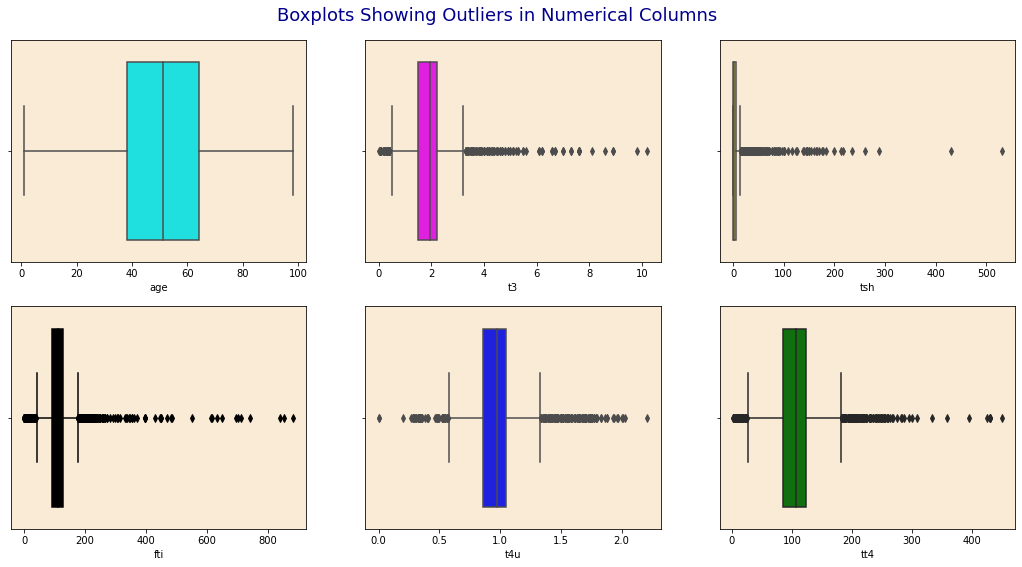

In [188]:
#Ill first check for outliers in the dataset with box plot
column_1 = ['age', 't3', 'tsh', 'fti', 't4u', 'tt4']

#Ill then  craft a list of colors for the boxplots
colors = ['cyan','magenta','yellow','black','blue','green']

# plotting the boxplots
figgg, axes = plt.subplots(2,3, figsize=(18,9))
plt.suptitle('Boxplots Showing Outliers in Numerical Columns', fontsize=18, color='darkblue', y=0.93)
#Ill then use a for loop for iterartion
for ax, data, col, color in zip(axes.flatten(), df_copy, column_1, colors):
  sns.boxplot(df_copy[col], ax=ax, color=color)
  ax.set_facecolor('antiquewhite')
plt.show();
 

**I will not the outliers as they will take a huge percentage of the project.**

([<matplotlib.axis.XTick at 0x7f1a66c72310>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

Text(0.5, 1.0, 'Number of Men and Women in the dataset')

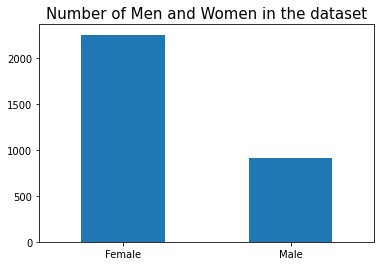

In [189]:
#Ill then plot a bar graph to show the distribution in the sec column
df_copy.sex.value_counts().plot(kind='bar')
plt.xticks((np.arange(0, 2,)), ('Female', 'Male'), rotation=360)
plt.title('Number of Men and Women in the dataset', fontsize=15, color='black')
plt.show()
#Females are more

Text(0.5, 1.0, 'Age distribution of patients')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number')

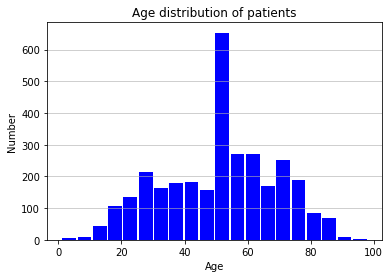

In [190]:
#Ill then plot a histogram to show distribution of the patients age
df_copy.age.plot.hist(grid=False, bins=20, rwidth=0.9,
                   color='blue')
plt.title('Age distribution of patients')
plt.xlabel('Age')
plt.ylabel('Number')
plt.grid(axis='y', alpha=0.75)


**The output shows that their is a high number of patients between 50 and 60**

### ***Bivariate Analysis***
Bivariate analysis involves two different variables. It aims to find out the causes and relationships between those two variables.



In [191]:
#Ill first preview my dataset
df_copy.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,0,72.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,15.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,0,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,0,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,0,77.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [192]:
#Ill first check the overall correlation of the  columns
corr = df_copy.corr()
corr

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
status,1.000000,-0.035415,-0.017527,0.033652,0.029785,0.013020,-0.041868,-0.047477,0.025616,0.021306,0.023216,0.025340,0.005632,-0.010847,-8.912872e-02,-5.820097e-01,-6.868200e-02,1.865430e-01,-6.545094e-02,3.765792e-01,-6.530818e-02,-8.114960e-02,-6.516520e-02,3.162585e-01
age,-0.035415,1.000000,-0.008913,-0.001492,-0.019763,-0.058943,-0.012284,0.048322,-0.087881,-0.159354,0.064631,-0.063094,-0.021320,-0.037187,2.014359e-01,-7.429077e-03,1.768487e-01,-2.686477e-01,1.263930e-01,-9.117529e-02,1.241160e-01,-1.946565e-01,1.246650e-01,1.546035e-02
sex,-0.017527,-0.008913,1.000000,0.121486,-0.054593,0.018664,0.038623,0.063703,0.057096,0.090461,-0.022396,0.003019,0.015961,0.089982,-3.611428e-02,3.451733e-02,-9.875777e-02,7.739279e-02,-9.207147e-02,1.727702e-01,-9.149477e-02,1.995841e-01,-9.352097e-02,7.764058e-02
on_thyroxine,0.033652,-0.001492,0.121486,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,7.371133e-02,-3.147937e-03,-1.616563e-01,1.880095e-02,6.085599e-02,2.141679e-01,6.048229e-02,7.192532e-02,6.344687e-02,1.135207e-01
query_on_thyroxine,0.029785,-0.019763,-0.054593,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-1.080531e-01,-1.495940e-02,-8.712329e-02,-1.514719e-02,3.888622e-02,-2.009985e-02,3.880140e-02,-3.459826e-02,3.871645e-02,-4.386403e-03
on_antithyroid_medication,0.013020,-0.058943,0.018664,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-2.944865e-02,-1.494155e-03,-1.848694e-02,6.308933e-02,-4.813860e-02,-2.967621e-03,-4.836372e-02,2.579721e-02,-4.858990e-02,-1.741018e-02
thyroid_surgery,-0.041868,-0.012284,0.038623,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,3.689035e-02,1.118306e-02,7.928734e-03,-8.658540e-03,7.815542e-03,-1.764577e-02,7.613078e-03,2.400594e-02,7.409903e-03,-2.632235e-02
query_hypothyroid,-0.047477,0.048322,0.063703,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,5.255328e-02,6.628605e-02,-2.027678e-02,-4.290464e-02,3.970123e-02,-1.491521e-02,3.943660e-02,3.526582e-02,3.917118e-02,-4.675330e-02
query_hyperthyroid,0.025616,-0.087881,0.057096,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-1.372360e-01,-2.492156e-02,-3.327552e-02,1.888334e-01,-9.200056e-02,1.506073e-01,-9.250933e-02,7.197632e-02,-9.302042e-02,7.763311e-02
pregnant,0.021306,-0.159354,0.090461,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,8.422148e-03,-1.393243e-02,3.193077e-02,2.013056e-01,-3.400278e-04,1.654025e-01,-5.083199e-04,3.242593e-01,-6.772365e-04,-7.124221e-03


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'A Heatmap of Patient Correlation in our Dataset')

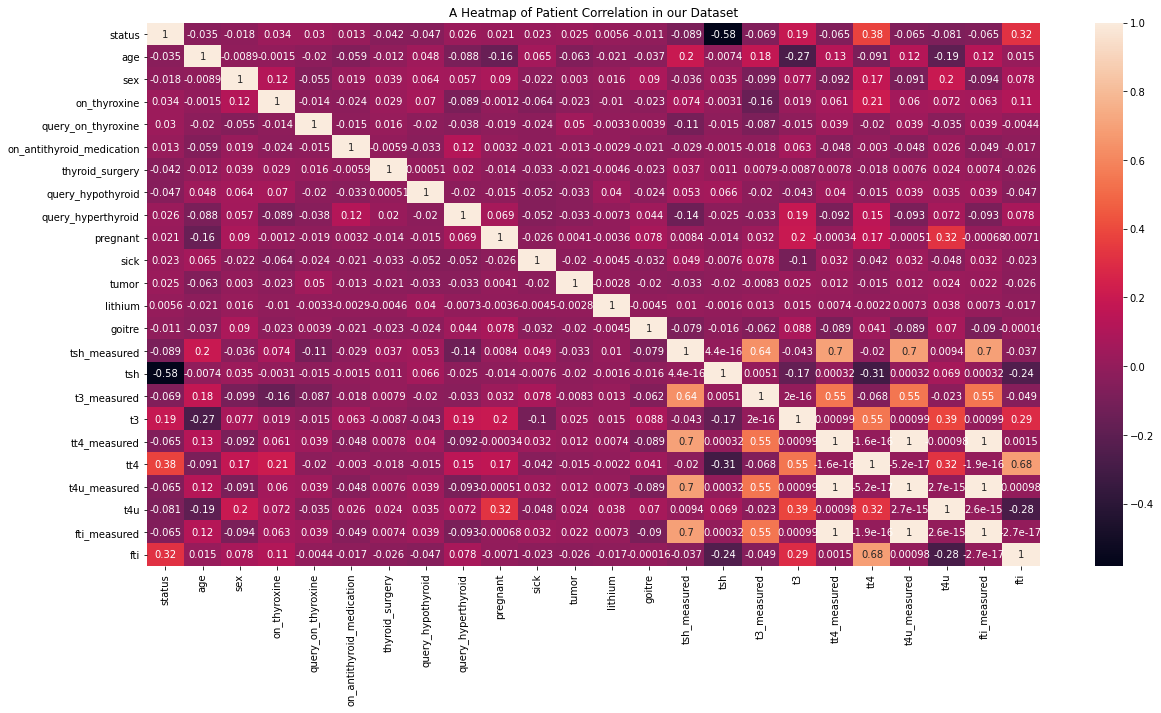

In [193]:
#Ill then a plot a heatmap to show the coorelation of the variables
correlation= df_copy.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title('A Heatmap of Patient Correlation in our Dataset', color='black')
plt.show()


***Conclusion***

1. Problem that were encountered was the pairplot was not running 
2. From the above EDA, I chose not to drop the outliers for this project cause it will take a high percentage of data.
3. I also found out that most patients were Females.
4. Most patients were from the age 50 and 60.


## ***Modelling***

### ***Random Forest Classifier***


In [194]:
#Ill first seperate the depenent variable and the independent variable
independent = df_copy.drop('status', 1)
dependent = df_copy['status']

In [195]:
#ILl then  split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=.25, random_state=34)
#Ill then print out the shape of the train set and test set
print('X_train shape: ', X_train.shape, '\nY_Train Shape:', y_train.shape)
print('X_test  shape: ', X_test.shape, '\nY_Test Shape:', y_test.shape)

X_train shape:  (2372, 23) 
Y_Train Shape: (2372,)
X_test  shape:  (791, 23) 
Y_Test Shape: (791,)


In [196]:
# Ill then scale the train and test sets using stadard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
# Ill then instantiate the random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=20, max_depth=5)
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [198]:
#Ill check my models predictions
greg_Predicted = pd.DataFrame({'Actual': y_test, 'Predicted': rfc_pred})
greg_Predicted.head()

,Actual,Predicted
1752,1,1
1643,1,1
2410,1,1
2561,1,1
103,0,0


In [199]:
# ILl then print out the 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))
print('R2 squared:', metrics.r2_score(y_test, rfc_pred)) 
print('Accuracy Score:', metrics.accuracy_score(y_test, rfc_pred))

Mean Absolute Error: 0.008849557522123894
Mean Squared Error: 0.008849557522123894
Root Mean Squared Error: 0.09407208683835973
R2 squared: 0.7494343379491357
Accuracy Score: 0.9911504424778761


***The accuracy of this model shows a 99% accuracy,It could be overfitting***

True

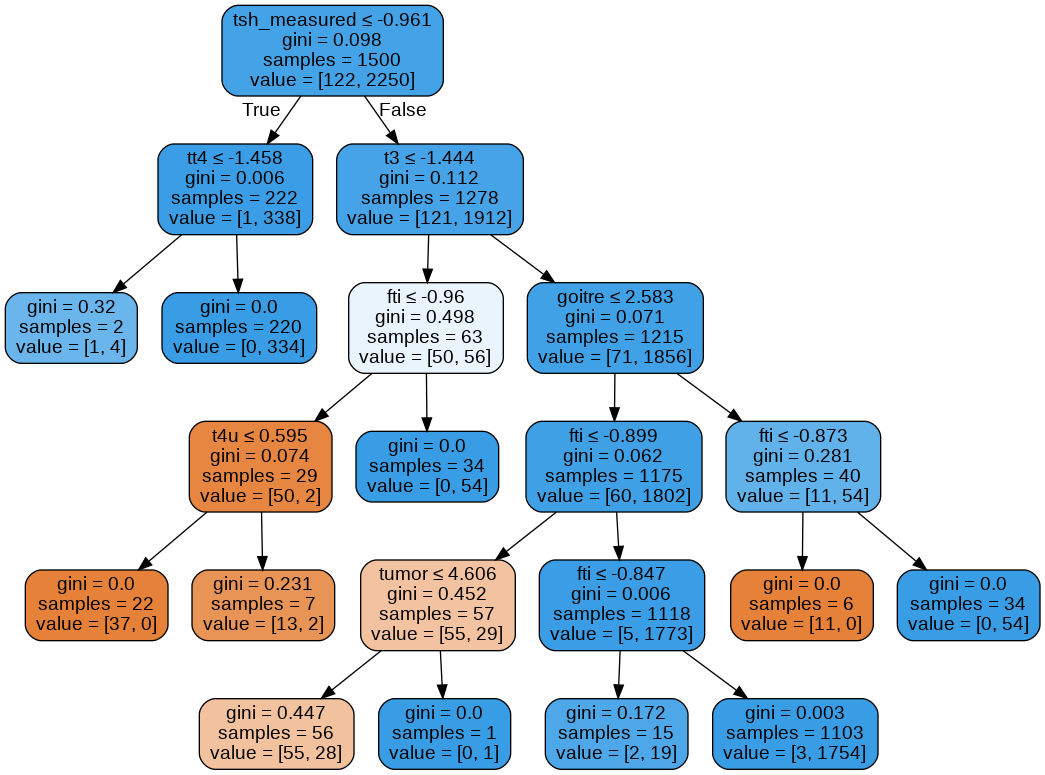

In [200]:

# lll then plott the decision trees from the random forest
dot_data = StringIO()
test_features = df_copy.columns.to_list()
test_features.remove('status')
tree = rfc.estimators_[50]

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, \
                special_characters=True, feature_names=test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

***Conclusion***

The plot shows the most important features in predicting whether a person is hypothyroid or not.

**. the most import feature is fti test which accounts for 76% of the total feature importance**


## ***Gradient Boosting Classifier***

In [203]:
#ILl then  split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=.25, random_state=34)


In [204]:
# Ill then scale the train and test sets using MinMaxScaler
mscaler = MinMaxScaler()
X_train = mscaler.fit_transform(X_train)
X_test = mscaler.transform(X_test)

In [205]:
#Ill first create  a list so as to get the best learning rate
list = [.05, .075, .1, .25, .5, .75, 1]

for x in list:
  gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=x, \
                                      max_features=2, max_depth=5, random_state=42)
  gboost.fit(X_train, y_train)

  print('Learning rate: ', x)
  print('Training set accuracy score: {0:.3f}' .format(gboost.score(X_train, y_train)))
  print('Test set accuracy score: {0:.3f}' .format(gboost.score(X_test, y_test)))

  

# The output shows the best learing rate is 0.25

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.05
Training set accuracy score: 0.997
Test set accuracy score: 0.991


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.075
Training set accuracy score: 0.998
Test set accuracy score: 0.991


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.1
Training set accuracy score: 1.000
Test set accuracy score: 0.991


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.25
Training set accuracy score: 1.000
Test set accuracy score: 0.992


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.5
Training set accuracy score: 0.683
Test set accuracy score: 0.661


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.75
Training set accuracy score: 1.000
Test set accuracy score: 0.985


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  1
Training set accuracy score: 0.807
Test set accuracy score: 0.804


In [206]:
#ILl then get the accuracy score of the model
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, \
                                  max_features=2, max_depth=5, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print('\nAccuracy Score: ', metrics.accuracy_score(y_test, gb_pred))


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=5,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy Score:  0.9873577749683944


## ***ADA Boost Classifier***

In [207]:
#ILl then  split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=.25, random_state=34)

In [208]:
# ILl then instantiate the ada boost classifier object

ADA = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ADA_boost= ADA.fit(X_train, y_train)
ADApred = ADA_boost.predict(X_test)

In [209]:
# ill then get the accuracy of the model
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('Ada Boost Classifier Accuracy: ', round(metrics.accuracy_score(y_test, ADApred) * 100, 2),'%')

Ada Boost Classifier Accuracy:  99.12 %


## ***Support Vector Machines***

<Figure size 720x576 with 0 Axes>

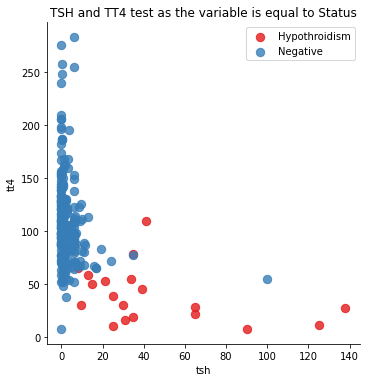

In [210]:
# Ill then plot data and regression model
plt.figure(figsize=(10,8))
sample_hypo = df_copy.sample(300, random_state=308)
sns.lmplot('tsh', 'tt4', data=sample_hypo, hue='status', legend=False, palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.legend({'Hypothroidism': 0, 'Negative': 1})
plt.title('TSH and TT4 test as the variable is equal to Status')
plt.show();


### ***Fitting the Model***

In [211]:
# Ill then input the model
fitting= sample_hypo[['tsh', 'tt4']].values
# specifying label for the model
label_type = sample_hypo['status'].values
X_train, X_test, y_train, y_test = train_test_split(fitting, label_type, test_size=.25, random_state=34)

In [212]:
# fitting the model
svmodel = SVC(kernel = 'linear')
svclass = svmodel.fit(X_train, y_train)

[]

[]

Text(0.5, 1.0, 'Hypothyroid Classification with linear SVC')

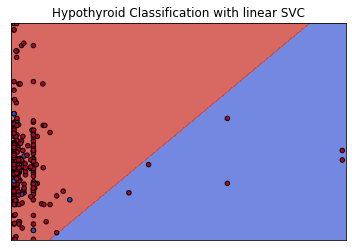

In [213]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = svclass.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
t_sam = np.random.choice(fitting[:, 0], 300)
t_sam2 = np.random.choice(fitting[:, 1], 300)
X0, X1 = t_sam,t_sam2
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svclass, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=label_type, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel('TT4')
# ax.set_xlabel('TSH')
ax.set_xticks(())
# ax.legend(['Hypothyroid', 'Negative'])
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [214]:
# Ill first take a sample of the dataframe
sample= df_copy.sample(300, random_state=308)


In [215]:
# input for the model
sample_feat = sample[['tsh', 'tt4']].values
# specifying label for the model
katono = sample['status'].values

sample_feat.shape


(300, 2)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(sample_feat, katono, test_size=.25, random_state=34)

In [217]:
model3 = SVC(kernel='poly', degree=3, gamma='auto', random_state=308)

# Ill then train the model usin the training sets
model3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=308, shrinking=True, tol=0.001,
    verbose=False)

[]

[]

Text(0.5, 1.0, 'Flower Classification with polynomial SVC')

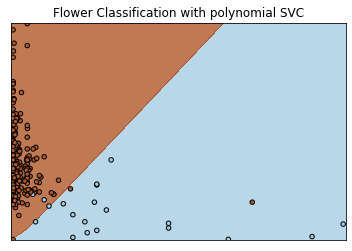

In [218]:
# visualizing the data points in the kernel
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = model3.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')

# Set-up grid for plotting.
# pol_sam = np.random.choice(polfeat[:, 0], 300)
# pol_sam2 = np.random.choice(polfeat[:, 1], 300)
X0, X1 = sample_feat[:, 0], sample_feat[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model3, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=poltar, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

***Conclusion***

Random Forests, Ada Boosted Trees, Gradient Boosted and SVCs are generally good prediction models for testing for hypothyroidism.

